In [43]:
%matplotlib inline
import os
import sys
from datetime import datetime

import matplotlib.pyplot as plt
import matplotlib.patches as patches



import torch
import torch.nn as nn
import torch.nn.functional as F

import torchvision
from torchvision import transforms, datasets
from torchvision.datasets import VOCDetection
import cv2

In [44]:
transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
])

voc_dataset = VOCDetection(root='./data', 
                           year='2012', 
                           image_set='train',
                           download=True, 
                        #    transform=transform
                           )

print(f"Number of images in the dataset: {len(voc_dataset)}")


Using downloaded and verified file: ./data\VOCtrainval_11-May-2012.tar
Extracting ./data\VOCtrainval_11-May-2012.tar to ./data
Number of images in the dataset: 5717


In [67]:
# torch images are [C, H, W]
image, annotation = voc_dataset[200]

# to visualize the image, we need to change the order of the channels to [H, W, C]
# image = image.permute(1, 2, 0).numpy()

In [68]:
image.size

(500, 375)

In [69]:
annotation

{'annotation': {'folder': 'VOC2012',
  'filename': '2008_000815.jpg',
  'source': {'database': 'The VOC2008 Database',
   'annotation': 'PASCAL VOC2008',
   'image': 'flickr'},
  'size': {'width': '500', 'height': '375', 'depth': '3'},
  'segmented': '0',
  'object': [{'name': 'person',
    'pose': 'Right',
    'truncated': '1',
    'occluded': '0',
    'bndbox': {'xmin': '5', 'ymin': '1', 'xmax': '134', 'ymax': '351'},
    'difficult': '0'},
   {'name': 'dog',
    'pose': 'Left',
    'truncated': '0',
    'occluded': '0',
    'bndbox': {'xmin': '252', 'ymin': '223', 'xmax': '301', 'ymax': '259'},
    'difficult': '0'}]}}

In [70]:
def visualize_image(image, annotations):
    # Create a matplotlib figure and axis
    fig, ax = plt.subplots(1)
    # Display the image
    ax.imshow(image)

    # Annotations is a dictionary with keys like 'annotation' and 'object'
    objects = annotations['annotation']['object']
    if type(objects) == dict:  # If there's only one object, it's a dictionary
        objects = [objects]
    
    for obj in objects:
        # Each object has a bounding box and a name
        bbox = obj['bndbox']
        label = obj['name']
        
        # Extract coordinates for the bounding box
        x_min, y_min = int(bbox['xmin']), int(bbox['ymin'])
        x_max, y_max = int(bbox['xmax']), int(bbox['ymax'])
        width, height = x_max - x_min, y_max - y_min
        
        # Create a rectangle patch for the bounding box
        rect = patches.Rectangle((x_min, y_min), width, height, linewidth=1, edgecolor='r', facecolor='none')
        
        # Add the rectangle to the plot
        ax.add_patch(rect)
        
        # Add the label
        plt.text(x_min, y_min, label, color='white', fontsize=8, bbox=dict(facecolor='red', edgecolor='none', pad=2))

    plt.axis('off')  # Turn off axis numbers and ticks
    plt.show()

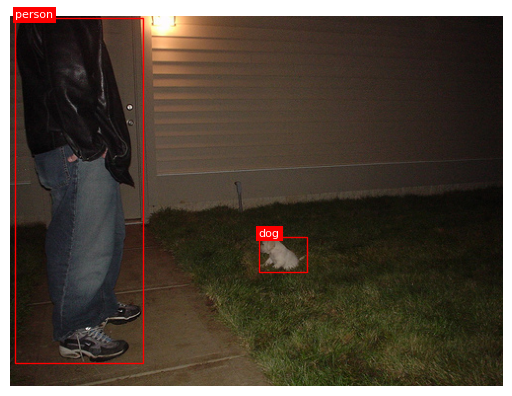

In [71]:
visualize_image(image, annotation)